### ESCUELA DE INGENIERÍA MECATRÓNICA

# PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES
## Alumnos:

- Romero Zavaleta, Joshep Andrés
- Rodríguez Alva, Luís Fernando
- Moreno Lozada, Sofía

### PRACTICA 09: Redes Neuronales.

# **Fundamentos de inteligencia artificial**
### Mg. Ing. Emerson Maximo Asto Rodriguez

A lo largo de este cuaderno, explicaremos cómo usar el poder de la computación en la nube con Google Colab para un ejemplo clásico –*El problema de clasificación de iris*– usando el conjunto de datos https://en.wikipedia.org/wiki/Iris_flower_data_set.

Para este problema de clasificación, construiremos una red neuronal artificial completamente conectada (multilayer perceptron).

Para el desarrollo de la red neuronal usaremos es [Tensorflow 2.0](https://www.tensorflow.org) con el módulo [Keras](https://keras.io/).


### Enunciado del problema

* Lograr un modelo neuronal que prediga que especie de flor iris.

> #### Objetivo
> Entrenar una red neuronal para solucionar el conjunto de datos Iris
>
> **Pasos a seguir**
> - Cargar la base de datos
> - Realizar el preprocesamiento de la data
> - Construir el modelo
> - Fijar hiperparámetros
> - Entrenar el modelo
> - Guardar y descargar el modelo entrenado
> - Realizar predicciones

## Instalación de dependencias

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## La base de datos Iris

In [4]:
from IPython.display import HTML
url = 'https://en.wikipedia.org/wiki/Iris_flower_data_set'
iframe = '<iframe src=' + url + ' width="100%" height=400></iframe>'
HTML(iframe)

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Importando la base de datos

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [32]:
data = load_iris()

features = data["data"]
labels = data["target"]

In [33]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [34]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## División en conjunto de entrenamiento y prueba

![](https://www.includehelp.com/ml-ai/Images/splitting-data.jpg)

In [38]:
input_train, input_test, output_train, output_test = train_test_split(
    features, labels, test_size=0.3)

## Preprocesamiento de la data

Se aplicará una normalización para ayudar al modelo a tener una convergencia mas rápida y una menor pérdida.

![](https://www.thoughtco.com/thmb/YljDij3td0_u7ImVJyv3gvB_3Wk=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/zscore-56a8fa785f9b58b7d0f6e87b.GIF)

In [39]:
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

mean = input_train.mean(axis=0)
input_train -= mean

std = input_train.std(axis=0)
input_train /= std

input_test -= mean
input_test /= std

Y finalmente estamos cambiando nuestras etiquetas a vectores one-hot. Este proceso es esencial para problemas de clasificación como este. También es necesario que funcione nuestra última función de activación "Softmax".
>

Ejemplos de codificación one-hot:
>

0 (Virginica) se convierte en [1, 0, 0]
>

1 (Versicolor) se convierte en [0, 1, 0]
>

2 (Setosa) se convierte en [0, 0, 1]

In [40]:
from tensorflow import keras

print("Antes de la codificación one-hot", output_train)

output_train = keras.utils.to_categorical(output_train, 3)
output_test = keras.utils.to_categorical(output_test, 3)

print("Despues de la codificación one-hot:", output_train[0])

Antes de la codificación one-hot [1 0 0 1 1 2 1 0 0 2 2 2 2 2 2 2 0 2 2 1 0 1 2 0 0 2 1 2 0 1 2 2 1 1 1 1 0
 2 2 2 1 0 0 2 0 1 0 0 0 1 1 1 2 2 0 2 2 0 2 0 0 1 0 2 1 1 1 1 1 2 0 2 1 2
 1 2 2 2 0 2 2 2 0 1 2 0 1 1 0 0 0 2 1 1 1 1 1 2 2 1 0 0 2 1 0]
Despues de la codificación one-hot: [0. 1. 0.]


## **Modelamiento de la red neuronal**

- Ahora, vamos a crear nuestro modelo.Se inicia el objeto secuencial con una lista que contiene las capas que queremos usar.
- Capas Densas (Totalmente Conectadas): Son las capas simples que tienen conexiones entre cada neurona de entrada y salida.
- Se usaran ReLUs (Unidades Lineales Rectificadas) como funciones de activación para las capas ocultas y la función Softmax para la última capa.

![](https://miro.medium.com/max/563/1*4_BDTvgB6WoYVXyxO8lDGA.png)

In [41]:
model = Sequential([
  Dense(1500, activation="softmax", input_shape=(4,)),
  Dropout(0.5),
  Dense(800, activation="softmax"),
  Dropout(0.5),
  Dense(500, activation="softmax"),
  Dropout(0.3),
  Dense(3, activation="softmax")
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1500)              7500      
                                                                 
 dropout_9 (Dropout)         (None, 1500)              0         
                                                                 
 dense_13 (Dense)            (None, 800)               1200800   
                                                                 
 dropout_10 (Dropout)        (None, 800)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dropout_11 (Dropout)        (None, 500)               0         
                                                                 
 dense_15 (Dense)            (None, 3)                

- Ahora tenemos que decidir qué optimizador y función de pérdida usar para nuestro modelo. Dado que se trata de un problema de clasificación y dado que estamos utilizando Softmax para la última función de activación, nuestra elección debería ser Categorical Crossentropy.

- Y para nuestro optimizador, podemos elegir Adam o Adadelta. Por lo genera funcionan muy bien con muchos problemas diferentes.

In [42]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.3),
              metrics=['accuracy'])

## **Entrenamiento**

In [43]:
history = model.fit(input_train, output_train,
                    epochs=25,
                    validation_split=0.1)

Epoch 1/25
3/3 [==============================] - 3s 98ms/step - loss: 1.2124 - accuracy: 0.2872 - val_loss: 1.1050 - val_accuracy: 0.2727
Epoch 2/25
3/3 [==============================] - 0s 17ms/step - loss: 1.1064 - accuracy: 0.3830 - val_loss: 1.2667 - val_accuracy: 0.2727
Epoch 3/25
3/3 [==============================] - 0s 17ms/step - loss: 1.1369 - accuracy: 0.3830 - val_loss: 1.1275 - val_accuracy: 0.2727
Epoch 4/25
3/3 [==============================] - 0s 18ms/step - loss: 1.1535 - accuracy: 0.2660 - val_loss: 1.0814 - val_accuracy: 0.4545
Epoch 5/25
3/3 [==============================] - 0s 16ms/step - loss: 1.1317 - accuracy: 0.2872 - val_loss: 1.1294 - val_accuracy: 0.2727
Epoch 6/25
3/3 [==============================] - 0s 16ms/step - loss: 1.1049 - accuracy: 0.3830 - val_loss: 1.1569 - val_accuracy: 0.2727
Epoch 7/25
3/3 [==============================] - 0s 19ms/step - loss: 1.1031 - accuracy: 0.3830 - val_loss: 1.0969 - val_accuracy: 0.2727
Epoch 8/25
3/3 [===========

Mostramos los resultados

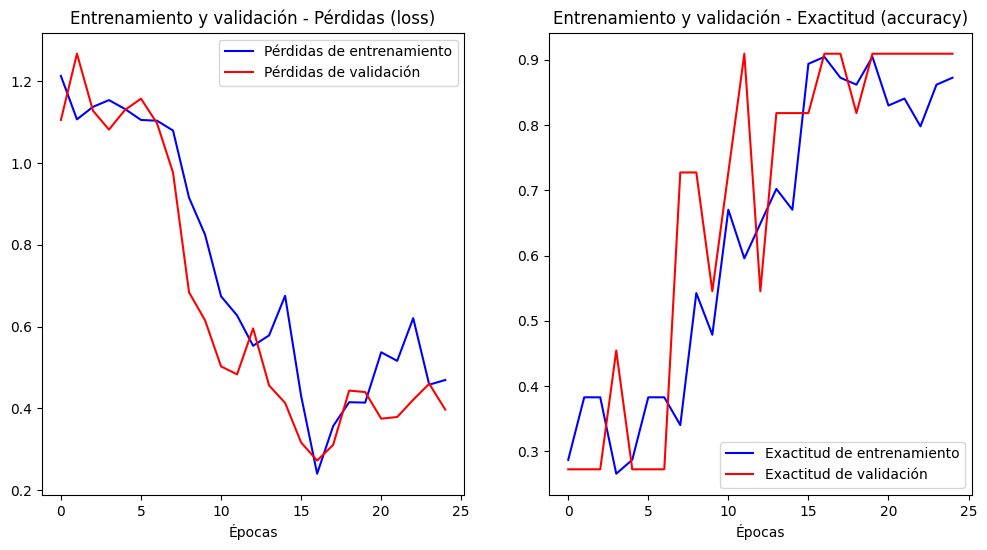

In [44]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(len(loss))

f, axarr = plt.subplots(1, 2, figsize=(12, 6))
p0 = axarr[0]
p1 = axarr[1]

p0.set_title("Entrenamiento y validación - Pérdidas (loss)")
p0.set_xlabel('Épocas')
p1.set_title("Entrenamiento y validación - Exactitud (accuracy)")
p1.set_xlabel('Épocas')

p0l0 = p0.plot(epochs, loss, "-b", label="Pérdidas de entrenamiento")
p0l1 = p0.plot( epochs, val_loss, "-r", label="Pérdidas de validación")

p1l0 = p1.plot(epochs, acc, "-b", label="Exactitud de entrenamiento")
p1l1 = p1.plot(epochs, val_acc, "-r", label="Exactitud de validación")

legend0 = p0.legend()
legend1 = p1.legend()

## Evaluación

In [45]:
score = model.evaluate(input_test, output_test)

print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

2/2 [==============================] - 0s 8ms/step - loss: 0.2950 - accuracy: 0.9111
Test Loss: 0.294991672039032
Test Accuracy: 0.9111111164093018


In [46]:
predictions = model.predict(input_test[0:])

true_labels = output_test[0:]

for i in range(len(predictions)):
  print("Predicción:", data["target_names"][predictions[i].argmax()], ",",
        "Etiqueta real:", data["target_names"][true_labels[i].argmax()])

2/2 [==============================] - 0s 5ms/step
Predicción: versicolor , Etiqueta real: versicolor
Predicción: versicolor , Etiqueta real: versicolor
Predicción: versicolor , Etiqueta real: versicolor
Predicción: setosa , Etiqueta real: setosa
Predicción: setosa , Etiqueta real: setosa
Predicción: virginica , Etiqueta real: virginica
Predicción: versicolor , Etiqueta real: versicolor
Predicción: setosa , Etiqueta real: setosa
Predicción: virginica , Etiqueta real: virginica
Predicción: virginica , Etiqueta real: versicolor
Predicción: versicolor , Etiqueta real: versicolor
Predicción: versicolor , Etiqueta real: versicolor
Predicción: setosa , Etiqueta real: setosa
Predicción: versicolor , Etiqueta real: versicolor
Predicción: virginica , Etiqueta real: versicolor
Predicción: setosa , Etiqueta real: setosa
Predicción: virginica , Etiqueta real: virginica
Predicción: virginica , Etiqueta real: virginica
Predicción: setosa , Etiqueta real: setosa
Predicción: setosa , Etiqueta real: se